In [132]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#preprocessing,model selection and metrices report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import f1_score


##models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import statsmodels.api as sm
import plotly.express as px


In [2]:
pwd

'/content'

In [3]:
train_values=pd.read_csv(r"/content/train_values.csv")
train_labels=pd.read_csv(r"/content/train.earth.csv")


In [4]:
train_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [6]:
train_values.isnull().sum()

,0
building_id,0
geo_level_1_id,0
geo_level_2_id,0
geo_level_3_id,0
count_floors_pre_eq,0
age,0
area_percentage,0
height_percentage,0
land_surface_condition,0
foundation_type,0


In [7]:
train_values.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,...,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,...,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#merge the label/target column with features
train_values=pd.merge(train_values,train_labels,on='building_id')

In [9]:
train_values

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,2


Text(0.5, 1.0, 'Damage grade')

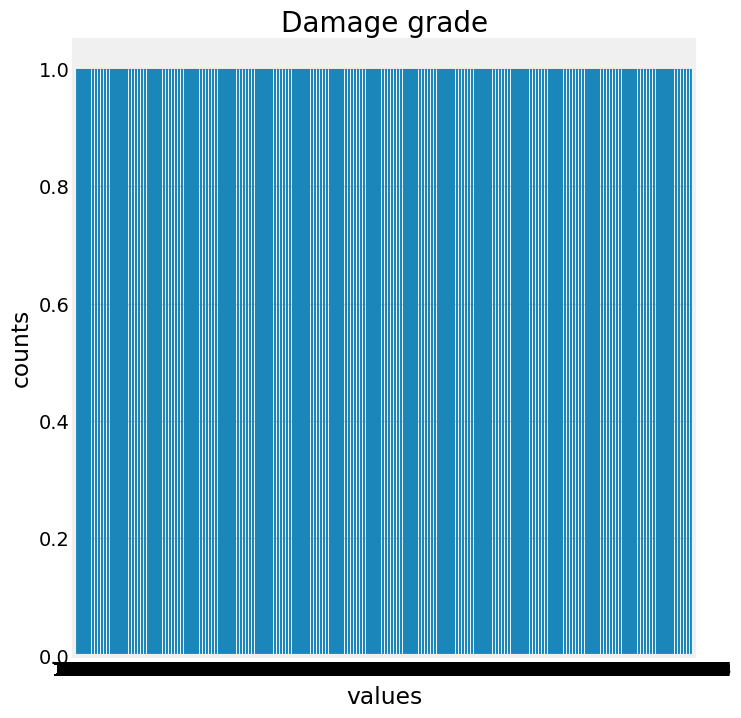

In [10]:
plt.figure(figsize=(8,8))
plt.style.use('fivethirtyeight')
sns.countplot(train_labels['damage_grade'])
plt.xlabel('values'); plt.ylabel('counts');
plt.title('Damage grade')

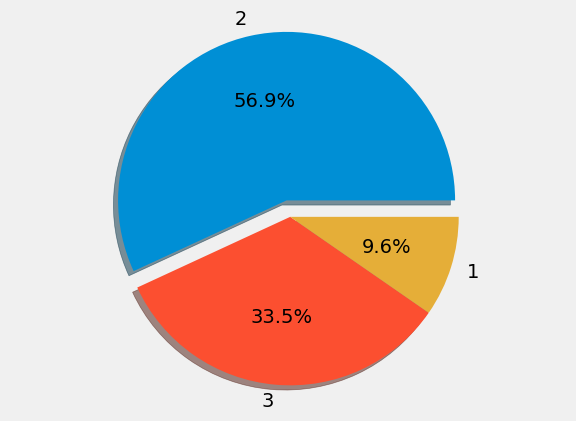

In [11]:
percent=list(train_values['damage_grade'].value_counts()/len(train_values['damage_grade'])*100)
label=list(train_values['damage_grade'].value_counts().index)
explode=(0.1,0,0)
fig,ax1=plt.subplots()
ax1.pie(percent,explode=explode,labels=label,autopct='%1.1f%%',shadow=True)
ax1.axis('equal')
plt.show()


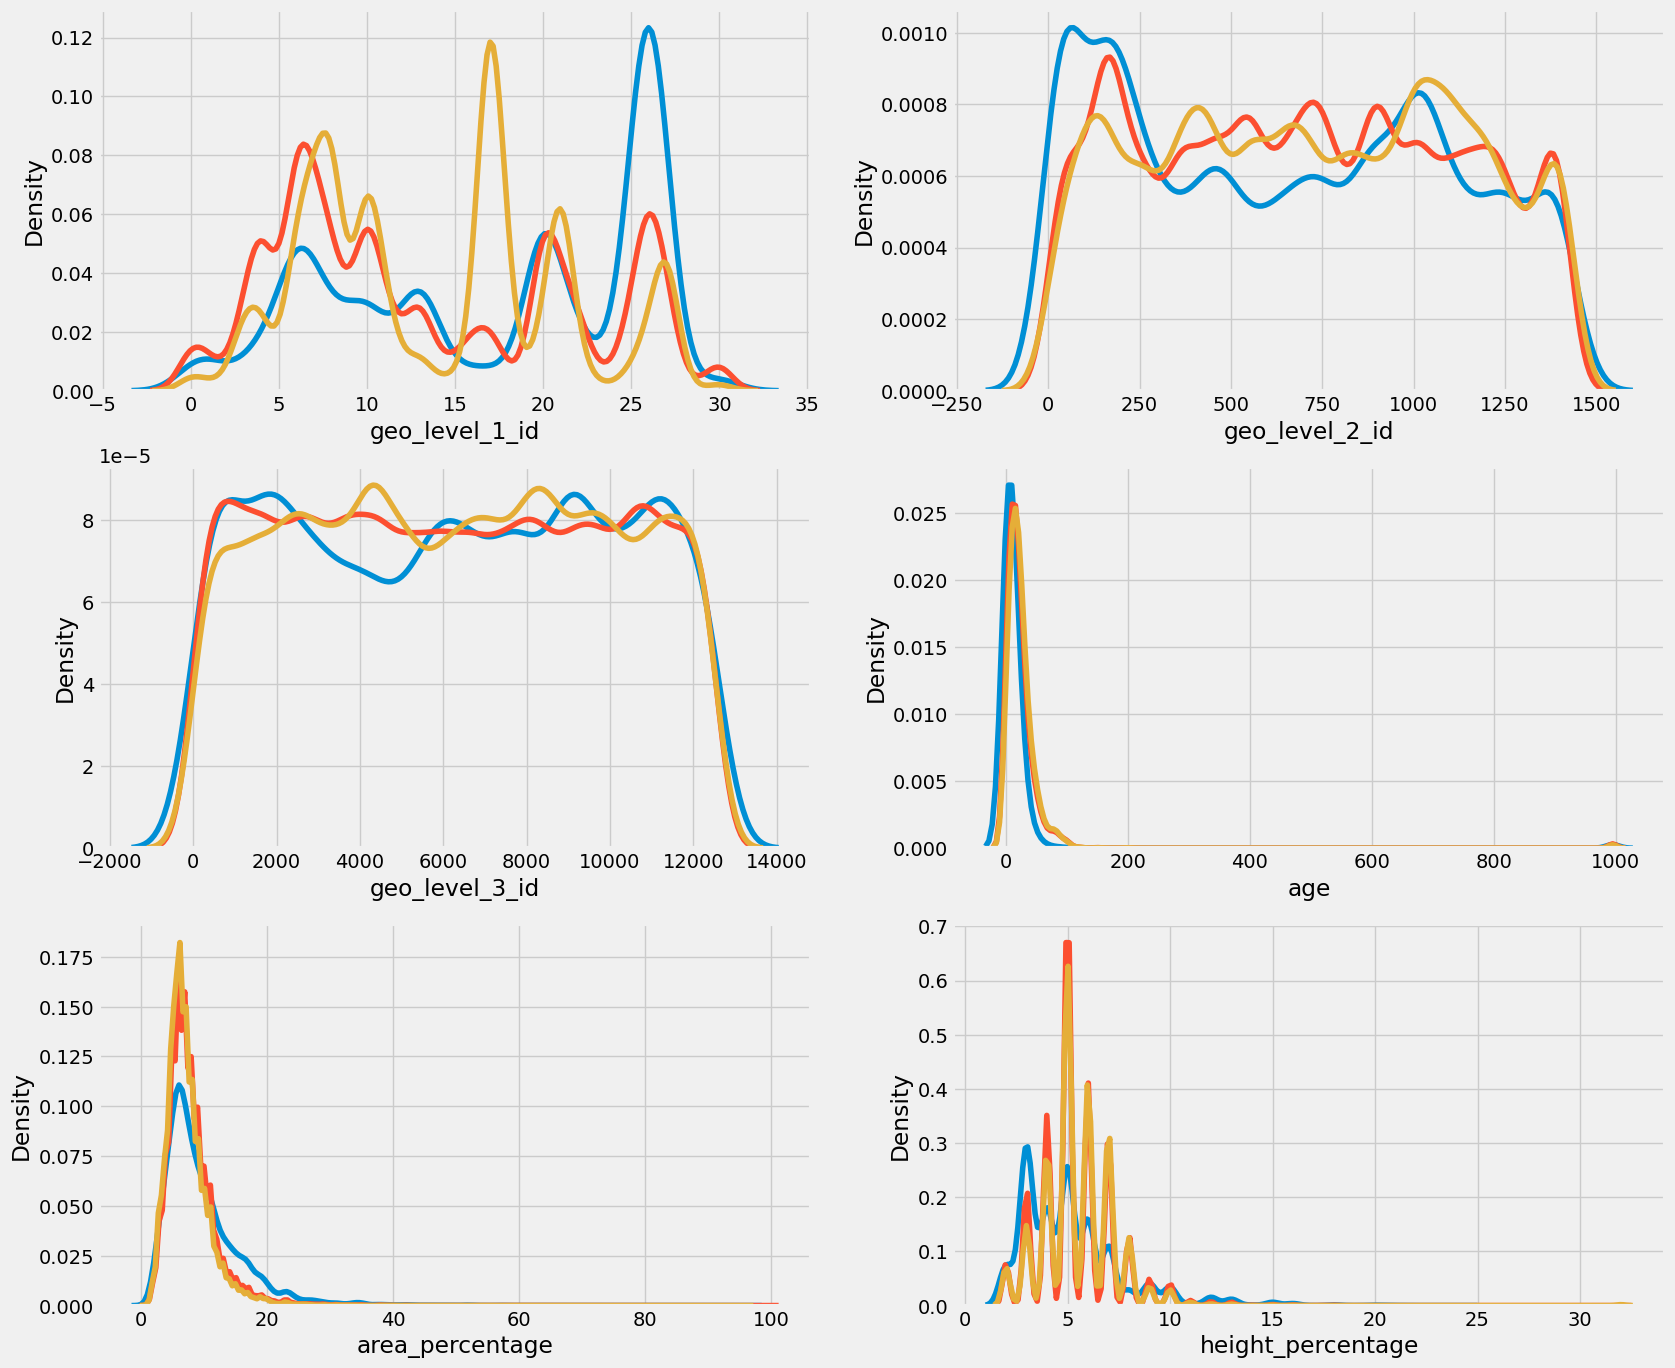

In [21]:
cont_values=['geo_level_1_id','geo_level_2_id','geo_level_3_id','age','area_percentage','height_percentage']

def densityplot(cont_values):
  fig=plt.figure(figsize=(18,16))
  plt.style.use('fivethirtyeight')
  for i,txt in enumerate(cont_values):
    ax=fig.add_subplot(3,2,i+1)
    sns.kdeplot(train_values.loc[train_values['damage_grade']==1,txt], ax=ax,label='damage_grade==1')
    sns.kdeplot(train_values.loc[train_values['damage_grade']==2,txt], ax=ax,label='damage_grade==2')
    sns.kdeplot(train_values.loc[train_values['damage_grade']==3,txt], ax=ax,label='damage_grade==3')
  plt.show()
densityplot(cont_values)


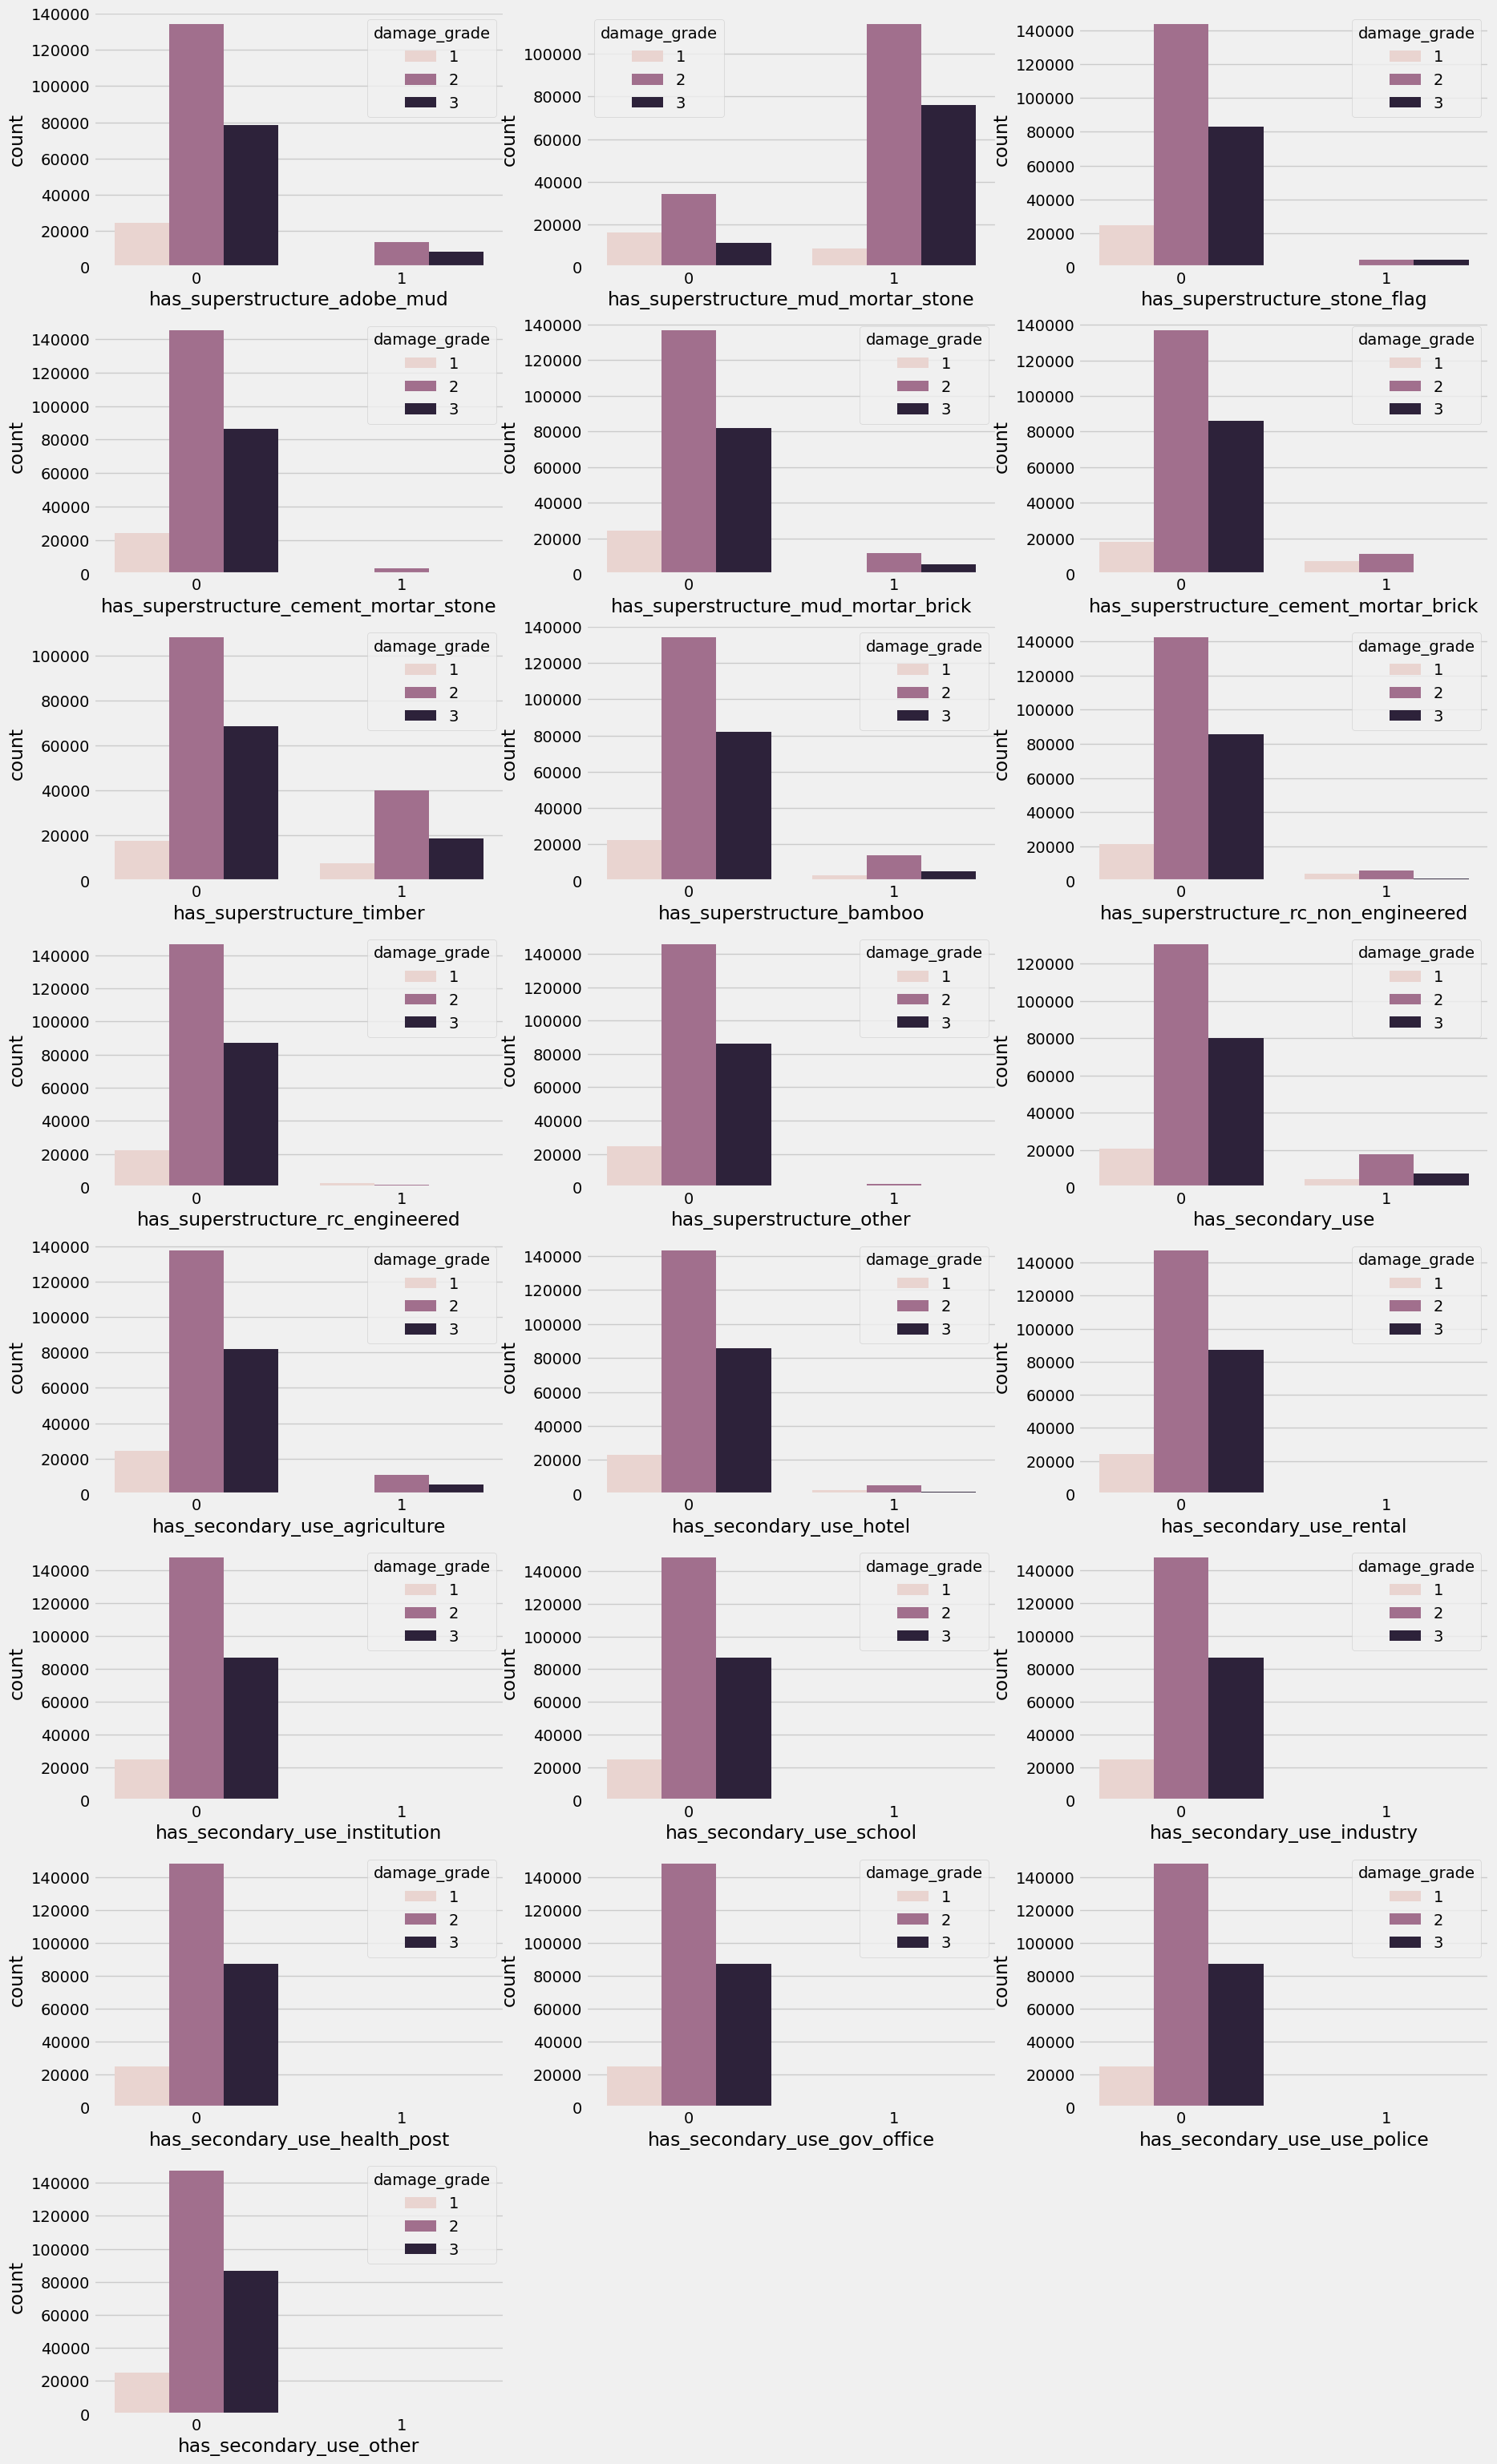

In [55]:
bin_cols=train_values.columns[train_values.columns.str.startswith('has')]

def countplot(bin_cols):
     plt.rcParams['font.size']=15
     plt.style.use('fivethirtyeight')
     fig=plt.figure(figsize=(20,37))
     for i,txt in enumerate(bin_cols):
      ax = fig.add_subplot(8,3,i+1)
      sns.countplot(x=train_values[txt], ax=ax, hue=train_values['damage_grade'])
     plt.show()
countplot(bin_cols)

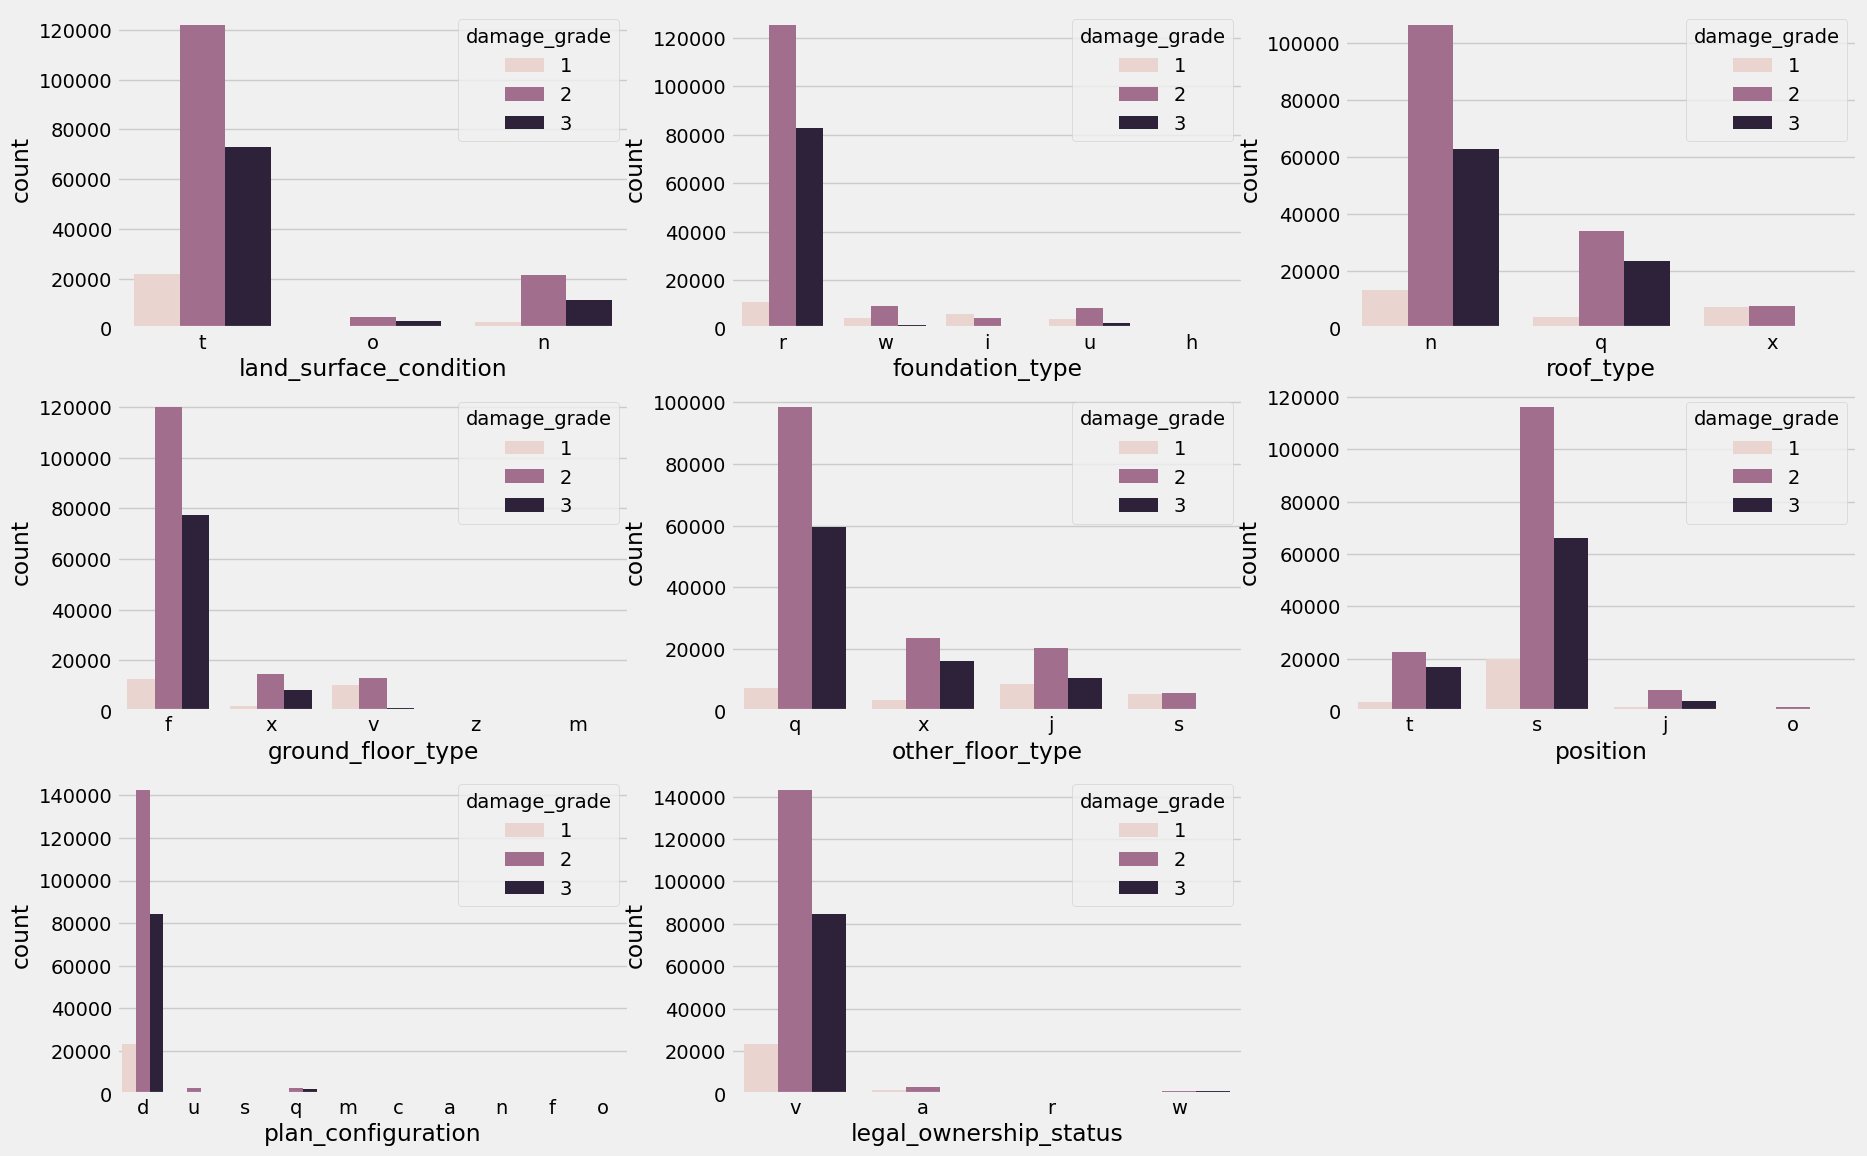

In [56]:
 cat_cols = train_values.select_dtypes(include='object').columns
 cat_cols

 def catplot(cat_cols):
   plt.rcParams['font.size']=15
   plt.style.use('fivethirtyeight')
   fig=plt.figure(figsize=(20,37))
   for i,txt in enumerate(cat_cols):
     ax = fig.add_subplot(8,3,i+1)
     sns.countplot(x=train_values[txt], ax=ax, hue=train_values['damage_grade'])
   plt.show()
 countplot(cat_cols)

In [57]:
 df_full = pd.concat([train_values],axis=0).reset_index(drop=True)
 df_full.shape

(260601, 40)

In [58]:
  def merge_by_concat(df1, df2, merge_on):
    merged_gf = df1[merge_on]
    merged_gf = merged_gf.merge(df2, on=merge_on, how='left')
    new_columns = [col for col in list(merged_gf) if col not in merge_on]
    df1 = pd.concat([df1, merged_gf[new_columns]], axis=1)
    return df1

In [60]:
geo_age_mean = df_full.groupby(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id'])['age'].agg(['mean']).reset_index().rename(columns={'mean': 'geo_grp_age_mean'})
geo_height_mean = df_full.groupby(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id'])['height_percentage'].agg(['mean']).reset_index().rename(columns={'mean': 'geo_grp_height_mean'})
geo_area_mean = df_full.groupby(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id'])['area_percentage'].agg(['mean']).reset_index().rename(columns={'mean': 'geo_grp_area_mean'})


In [62]:
type_age_mean = df_full.groupby(['foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type'])['age'].agg('mean').reset_index().rename(columns={'mean': 'type_age_mean'})
type_height_mean = df_full.groupby(['foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type'])['height_percentage'].agg('mean').reset_index().rename(columns={'mean': 'type_height_mean'})
type_area_mean = df_full.groupby(['foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type'])['area_percentage'].agg('mean').reset_index().rename(columns={'mean': 'type_area_mean'})


In [80]:
colname = []
val = []
bin_cols = df_full.columns[df_full.columns.str.contains('has')]

for bcol in bin_cols:
    colname.append(bcol)
    val.append(df_full[bcol].value_counts().sort_index().values)

pd.DataFrame(val, index=colname)


,0,1
has_superstructure_adobe_mud,237500,23101
has_superstructure_mud_mortar_stone,62040,198561
has_superstructure_stone_flag,251654,8947
has_superstructure_cement_mortar_stone,255849,4752
has_superstructure_mud_mortar_brick,242840,17761
has_superstructure_cement_mortar_brick,240986,19615
has_superstructure_timber,194151,66450
has_superstructure_bamboo,238447,22154
has_superstructure_rc_non_engineered,249502,11099
has_superstructure_rc_engineered,256468,4133


In [81]:
freq_cols = ['land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration','legal_ownership_status']

def frequency_plot(cols,df,self_encoding=False):
  for c in cols:
    fq_dict = df[c].value_counts().to_dict()
    if self_encoding:
      df[c] = df[c].map(fq_dict)
    else:
      df[c+'_fq'] = df[c].map(fq_dict)
  return df
  df_full_freq = frequency_plot(freq_cols,df_full,self_encoding=True)


In [89]:
df_full_freq = df_full.apply(lambda x: pd.Series(x.astype(str).value_counts(), dtype=int), axis=0)

train_new = df_full_freq[:train_values.shape[0]]
test_new = df_full_freq[train_values.shape[0]:]


In [92]:
corr_matrix = train_new.drop(columns=['building_id','damage_grade'], axis=1).corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column].abs()>0.95)]
print('Number of columns having collinearity with other columns other than target:',len(to_drop))

Number of columns having collinearity with other columns other than target: 23


**MODEL CREATION**

In [93]:
x=train_new.drop ('damage_grade',axis=1)
y=train_new['damage_grade']

train_new.shape


(260601, 40)

In [189]:
x=train_new.drop ('damage_grade',axis=1)
y=train_new['damage_grade']

In [190]:
def module_check_f1_score(model):
  model.fit(x_tran,y_train)
  test_y_pred=model.predict(x_test)
  print(f1_score(y_test,y_pred,average='micro'))

splitting train data as 75% and remaining as test data and validating the model


In [191]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

let us create a base prediction,by guessing damage grade value.Here w emay do value_counts and select the grade with most valuecounts as the guessing damage grade prediction value.using that value let us check base prediction to check our trained model score need to cross more than the base model

In [192]:
grade_guess = y_train.value_counts().index[0]
base_predicton = np.full(np.shape(y_test), grade_guess)

y_test = y_test.dropna()



# Recalculating base_prediction after removing NaN values
base_predicton = np.full(np.shape(y_test), grade_guess)
print('f1 score of base prediction with guess value:', f1_score(y_test, base_predicton, average='micro'))

f1 score of base prediction with guess value: 0.0


In [193]:
from sklearn.metrics import f1_score

lr = LogisticRegression(max_iter=200)
lr_score = model_f1_score(lr, X, y)

print('Basic LOGISTIC REGRESSION model with default params:', lr_score)


Basic LOGISTIC REGRESSION model with default params: 1.0


In [194]:
dc=DecisionTreeClassifier()
dc_score = check_model_f1_score(dc, X, y)

print('Basic DECISION TREE model with default params:',dc_score)

Basic DECISION TREE model with default params: 1.0


In [195]:
rc = RandomForestClassifier()
rc_score = check_model_f1_score(rc, X, y)

print('Basic RANDOM FOREST model with default params:',rc_score)

Basic RANDOM FOREST model with default params: 1.0


In [196]:
knc = KNeighborsClassifier()
knc_score = check_model_f1_score(knc, X, y)

print('Basic KNN model with default params:',knc_score)

Basic KNN model with default params: 1.0


In [211]:
xg=xgb.XGBClassifier()
xg_score = check_model_f1_score(xg, X, y)

print('Basic XGBOOST model with default params:',xg_score)

Basic XGBOOST model with default params: 1.0


<Figure size 1200x800 with 0 Axes>

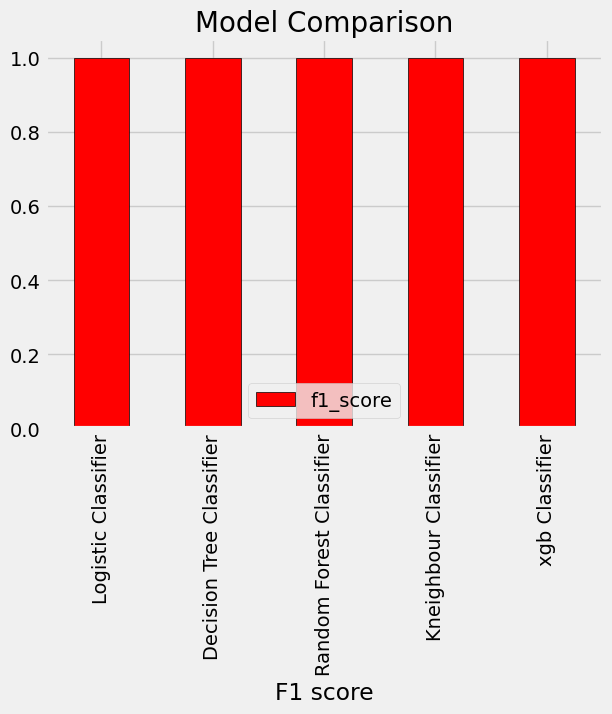

In [215]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
model_comparison = pd.DataFrame({
    'model': ['Logistic Classifier', 'Decision Tree Classifier', 'Random Forest Classifier', 'Kneighbour Classifier', 'xgb Classifier'],
    'fl score': [lr_score, dc_score, rc_score, knc_score, xg_score]  # Corrected the 'fl score' column
})

# Rename the column 'fl score' to 'f1_score'
model_comparison = model_comparison.rename(columns={'fl score': 'f1_score'})

##Horizontal bar chart of test mae
model_comparison.sort_values('f1_score', ascending=False).plot(x='model',y='f1_score',kind='bar',color ='red',edgecolor ='black')


##plot formatting
plt.ylabel(''); plt.yticks(size=14);plt.xlabel('F1 score'); plt.xticks(size=14)
plt.title('Model Comparison',size=20)
plt.show()

In [246]:
clf = xgb.XGBClassifier(
n_estimators =2000,
objective='multi:softmax',
num_class=3,
max_depth=12,
learning_rate=0.02,
subsample=0.8,
colsample_bytree=0.4,
missing=-1,
eval_metric='mlogloss',
nthread=4,
tree_meth0d='hist'
)


In [250]:
xgb_score= check_model_f1_score(clf, X, y)

print('XGBOOST model with default params:',xgb_score)

XGBOOST model with default params: 1.0
